In [30]:
# Establishing a connection for MYSQL
import pymysql
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

try:
    #Establish the connection
    conn= pymysql.connect(
        host='127.0.0.1',
        user='root',
        password='king',
        port=3306
    )

    #load data into Dataframe

    query="SELECT * FROM cars.car_price_dataset"
    df=pd.read_sql(query,conn)

    #Display the results
    print('connection successful.Here is your data :')
    display(df.head())
    display(df.info())
    print("Missing Values:")
    display(df.isnull().sum())

except pymysql.error as e:
    print(f"MySQL Error: {e}")

finally:
    if 'conn' in locals():
        conn.close()
        print('connection closed successfully !!!')

connection successful.Here is your data :


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


None

Missing Values:


Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

connection closed successfully !!!


In [31]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [32]:
#EDA

In [33]:
# Provides an overview of the dataset including mean, min, max, and quartiles.
#Basic Statistical Summary
print("Statistical Summary:")
display(df.describe())

Statistical Summary:


,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
Dataset Info:
 None

Summary Stats:
                Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324  

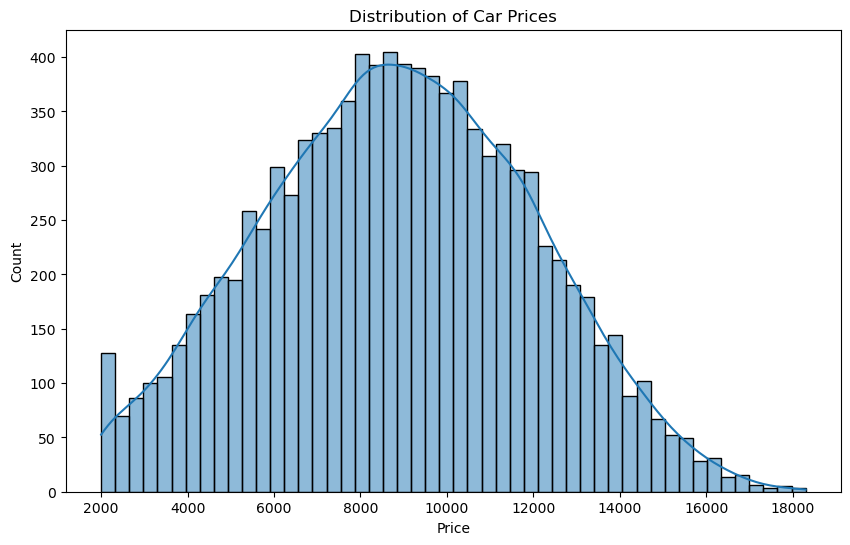

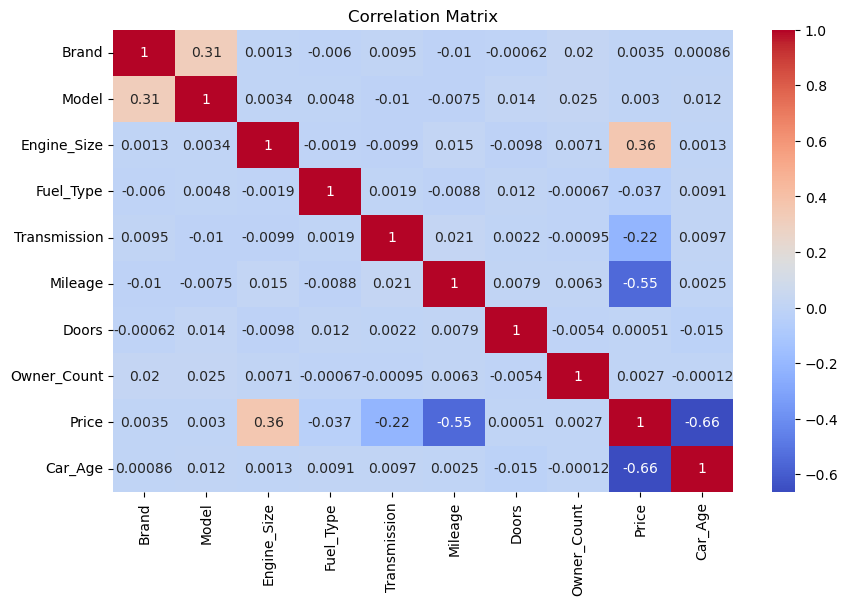

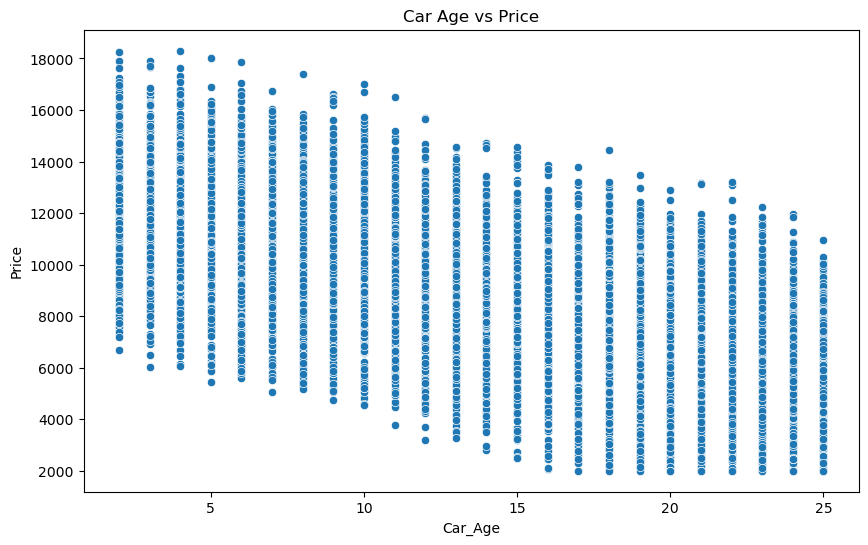

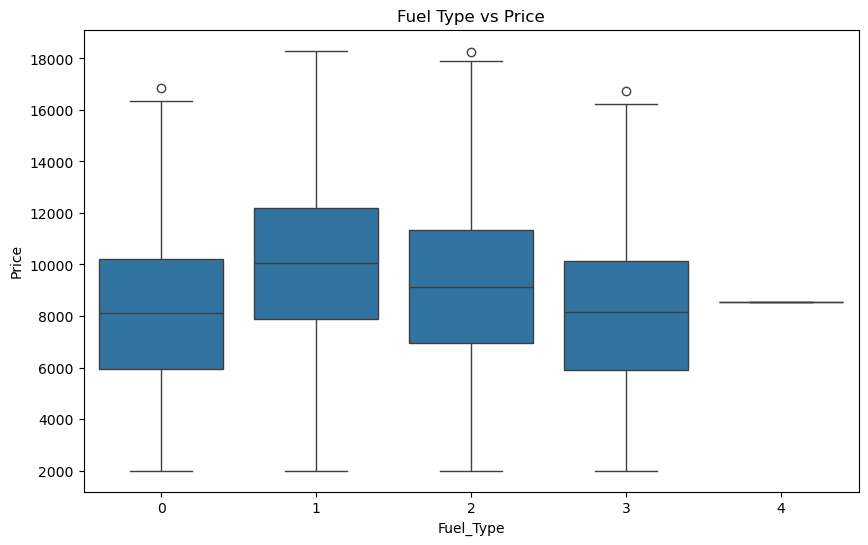

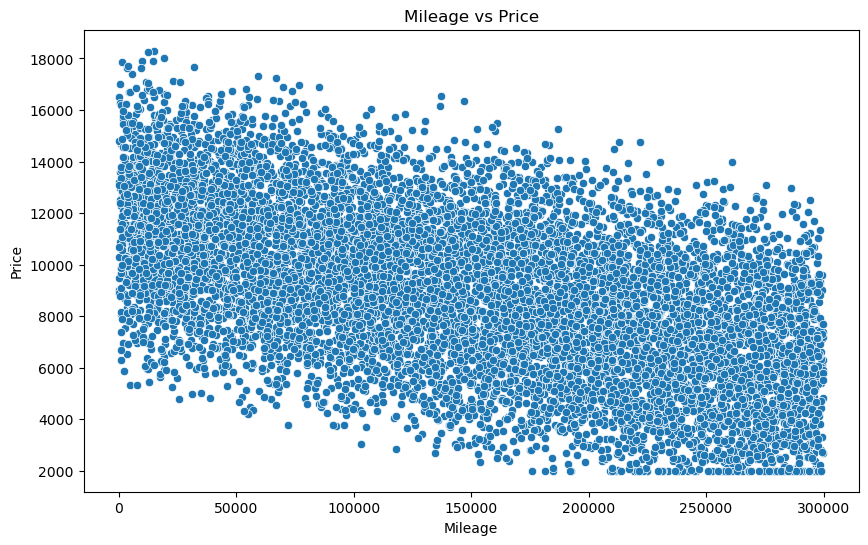

Training set shape: (8000, 9)
Test set shape: (2000, 9)


In [34]:
# Basic Info
import datetime
print("Dataset Info:\n", df.info())
print("\nSummary Stats:\n", df.describe())

# Create Car Age Feature
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Drop original 'Year' column (optional)
df.drop('Year', axis=1, inplace=True)

# Encode categorical features
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
label_encoders = {}
#label_mappings = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    # Store mapping for inspection
    #label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# EDA - Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Car_Age', y='Price', data=df)
plt.title('Car Age vs Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Fuel Type vs Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Mileage vs Price')
plt.show()

# Prepare data for ML
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)  # Ready for model building

In [35]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [37]:
#Xgb Boost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [38]:
#Evaluate:
print("Random Forest R2 Score:", r2_score(y_test, rf_preds))
print("XGBoost R2 Score:", r2_score(y_test, xgb_preds))

Random Forest R2 Score: 0.9762025304080226
XGBoost R2 Score: 0.9934861063957214


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 59848.55
R² Score: 0.99


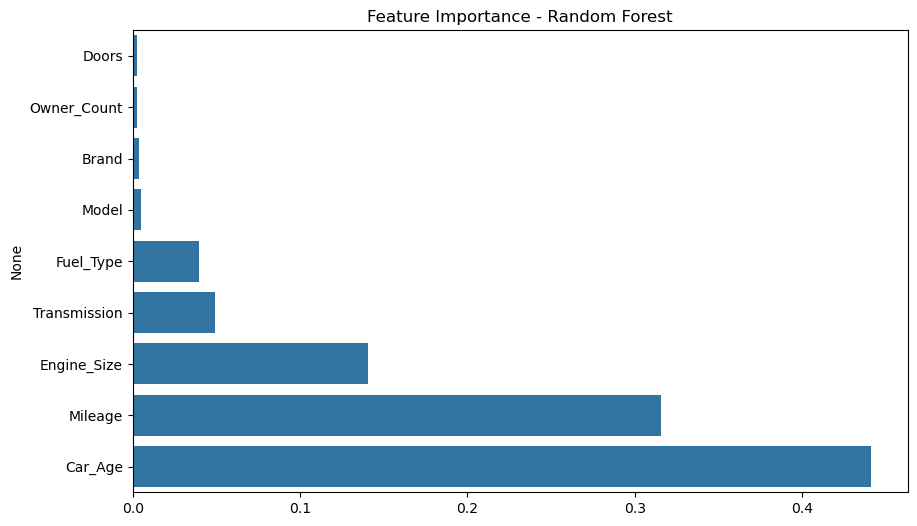

In [40]:
#Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# For Random Forest
importances = rf_model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.show()


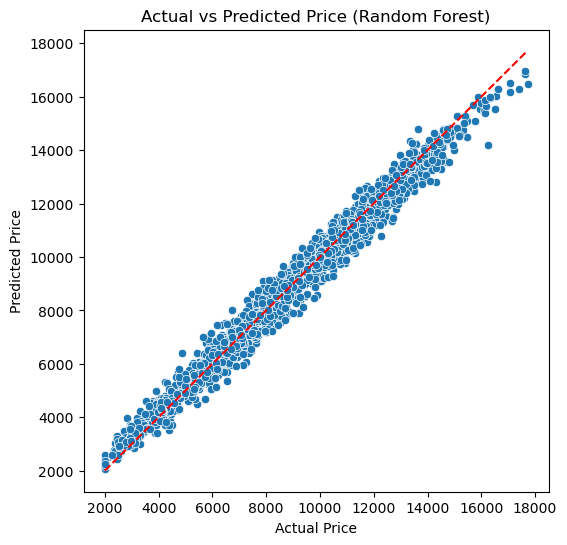

In [41]:
#Prediction vs Actual Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=rf_preds)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()


In [43]:
# Save the model (RandomForestRegressor())
with open('Car_Regressor_New.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)